In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from helper_fun import cross_entropy

f = open('./benchmark_data/hardware_plotter_input_ibmq_boeblingen_saturated.p', 'rb' )
plotter_inputs = []
while 1:
    try:
        plotter_inputs.append(pickle.load(f))
    except EOFError:
        break

In [2]:
repetition_idx = 0
case = (7,16)
plotter_input = plotter_inputs[repetition_idx][case]
print(plotter_input.keys())
uniter_percent_change = plotter_input['percent_reduction']
circ = plotter_input['circ']
d1 = plotter_input['evaluations']['sv_noiseless']
d2 = plotter_input['evaluations']['qasm']
d3 = plotter_input['evaluations']['qasm+noise']
d4 = plotter_input['evaluations']['hw']
d5 = [abs(x) for x in plotter_input['evaluations']['cutting']]
ground_truth = cross_entropy(target=d1,obs=d1)
qasm = cross_entropy(target=d1,obs=d2)
qasm_noise = cross_entropy(target=d1,obs=d3)
hw = cross_entropy(target=d1,obs=d4)
cutting = cross_entropy(target=d1,obs=d5)

percent_change = 100*(hw - cutting)/(hw - ground_truth)
ratio = (hw-cutting)/(cutting-ground_truth)
print(uniter_percent_change,percent_change,ratio)

dict_keys(['num_shots', 'circ', 'clusters', 'evaluations', 'searcher_time', 'classical_time', 'quantum_time', 'uniter_time', 'percent_reduction'])
96.41852981595058 96.41852981595058 26.921494487197975


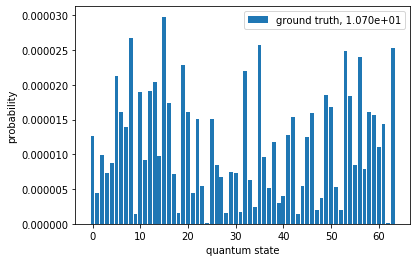

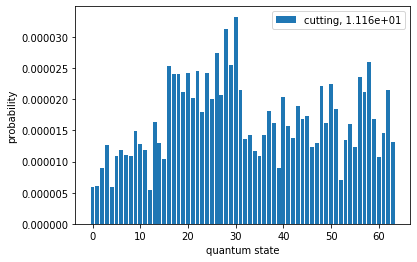

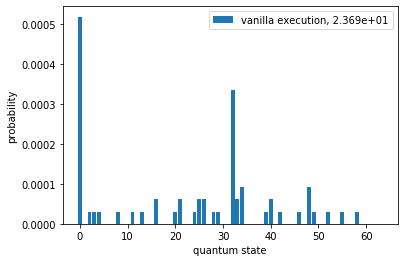

In [3]:
plot_range = min(64,len(d1))
x = np.arange(len(d1))[:plot_range]

plt.figure()
plt.bar(x,height=d1[:plot_range],label='ground truth, %.3e'%cross_entropy(d1,d1))
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.savefig('ground_truth_eg.png',dpi=400)

plt.figure()
plt.bar(x,height=d5[:plot_range],label='cutting, %.3e'%cross_entropy(d1,d5))
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.savefig('cutting_eg.png',dpi=400)

plt.figure()
plt.bar(x,height=d4[:plot_range],label='vanilla execution, %.3e'%cross_entropy(d1,d4))
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.savefig('vanilla_execution_eg.png',dpi=400)

# d1.sort()
# d2.sort()
# d3.sort()
# d4.sort()
# print(d1[-2:])
# print(sum(d1[-2:]),sum(d2[-2:]),sum(d3[-2:]),sum(d4[-2:]))